In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1.usa.gov data from bit.ly

In [12]:
path = '../pydata-book/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [15]:
import json
records = [json.loads(line) for line in open(path, "rt", encoding='UTF8')]

In [16]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [17]:
records[0]['tz']

'America/New_York'

## Counting Time Zones in Pure Python

In [19]:
# 레코드중 tz 가 없는 항목이 존재한다.
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [20]:
# 모든 레코드에 tz 가 있는건 아니다.
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [22]:
# 상위 10개 까지 출력
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [23]:
# 빈 타임존이 보인다.
# 이 부분을 필터해보자.
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [24]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [25]:
counts = get_counts(time_zones)

In [26]:
counts['America/New_York']

1251

In [27]:
len(time_zones)

3440

In [28]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [29]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [30]:
from collections import Counter

In [31]:
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

## Count Time Zones with pandas

In [32]:
from pandas import DataFrame, Series
import pandas as pd

In [33]:
frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [34]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [35]:
tz_counts = frame['tz'].value_counts()

In [36]:
tz_counts

America/New_York                  1251
                                   521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Indianapolis                20
America/Phoenix                     20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Stockholm                    14
Europe/Paris                        14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Helsinki                     10
Europe/Prague                       10
America/Puerto_Rico                 10
Europe/Moscow            

In [37]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unkown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unkown                  521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [40]:
clean_tz.value_counts()

America/New_York                  1251
Unkown                             521
America/Chicago                    400
America/Los_Angeles                382
America/Denver                     191
Missing                            120
Europe/London                       74
Asia/Tokyo                          37
Pacific/Honolulu                    36
Europe/Madrid                       35
America/Sao_Paulo                   33
Europe/Berlin                       28
Europe/Rome                         27
America/Rainy_River                 25
Europe/Amsterdam                    22
America/Phoenix                     20
America/Indianapolis                20
Europe/Warsaw                       16
America/Mexico_City                 15
Europe/Paris                        14
Europe/Stockholm                    14
America/Vancouver                   12
Pacific/Auckland                    11
Europe/Moscow                       10
Europe/Prague                       10
Europe/Helsinki          

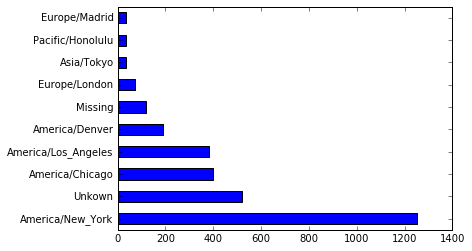

In [49]:
tz_counts[:10].plot(kind='barh', rot=0)

In [50]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [53]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [54]:
frame['a'][54]

'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; BTRS127482)'

In [55]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [56]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [66]:
cframe = frame[frame.a.notnull()]
cframe.a.str.contains('Windows')

0        True
1       False
2        True
3       False
4        True
5        True
6        True
7        True
8       False
9        True
10       True
11      False
12       True
14       True
15       True
16       True
17      False
18      False
19       True
20       True
21      False
22       True
23      False
24       True
25       True
26       True
27      False
28      False
29      False
30       True
        ...  
3529     True
3530     True
3531    False
3532     True
3533    False
3534    False
3535     True
3536    False
3537     True
3538    False
3539    False
3540     True
3541    False
3542     True
3544     True
3545     True
3546    False
3547    False
3548    False
3549     True
3550     True
3551     True
3552     True
3553     True
3554     True
3555     True
3556     True
3557    False
3558    False
3559     True
Name: a, dtype: bool

In [69]:
# agent 에 Windows 문자열이 포함되어 있는 데이터 프레임에서, Windows 또는 Not Windows 가 포함된 것만을 가져온다.
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [70]:
operating_system

array(['Windows', 'Not Windows', 'Windows', ..., 'Not Windows',
       'Not Windows', 'Windows'], 
      dtype='<U11')

In [78]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [75]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [85]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [91]:
# Use to sort in ascending order
# sum(1) : 'Not Windows' + 'Windows' 
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [96]:
count_subset = agg_counts.take(indexer)[-10:]

In [97]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


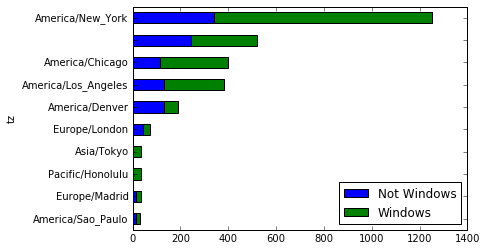

In [98]:
count_subset.plot(kind='barh', stacked=True)

In [99]:
normal_subset = count_subset.div(count_subset.sum(1), axis=0)

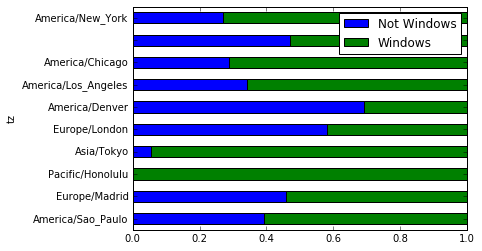

In [100]:
normal_subset.plot(kind='barh', stacked=True)

# MovieLens 1M Data Set

In [101]:
import pandas as pd

In [106]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('../pydata-book/ch02/movielens/users.dat', sep='::', header=None, names=unames, engine='python')

In [107]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('../pydata-book/ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')

In [108]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('../pydata-book/ch02/movielens/movies.dat', sep='::', header=None, names=mnames, engine='python')

In [109]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [110]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [111]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [112]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [113]:
# Merge three tables into one
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [114]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

In [120]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html
mean_ratings = data.pivot_table('rating', index=['title'], columns=['gender'], aggfunc='mean')

In [121]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [122]:
ratings_by_title = data.groupby('title').size()

In [123]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [124]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [125]:
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [126]:
mean_ratings = mean_ratings.ix[active_titles]

In [127]:
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [132]:
# see top films among female viewers, sort 'F' column in descending order:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


# Measuring rating disagreement

In [133]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [134]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [135]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Disagreement can be measured by the variance or standard deviation of ratigns:

In [143]:
# Standard deviation of ratings grouped by title
ratings_std_by_title = data.groupby('title')['rating'].std()
ratings_std_by_title[:2]

title
$1,000,000 Duck (1971)    1.092563
'Night Mother (1986)      1.118636
Name: rating, dtype: float64

In [144]:
# Filter down to active_titles
ratings_std_by_title = ratings_std_by_title.ix[active_titles]

In [145]:
# Order Series by value in descending order
ratings_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

# US Baby Names 1880 - 2010

In [147]:
import pandas as pd

In [148]:
names1880 = pd.read_csv('../pydata-book/ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [149]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

assemble all of the data into a single DataFrame:

In [151]:
# 2010 is the last available year right now
years = range(1880, 2010)
pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = '../pydata-book/ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
    # Concatenate everything into a single DataFrame
    names = pd.concat(pieces, ignore_index=True)

In [154]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [155]:
# mean_ratings = data.pivot_table('rating', index=['title'], columns=['gender'], aggfunc='mean')
total_births = names.pivot_table('births', index=['year'], columns=['sex'], aggfunc='sum')

In [156]:
total_births.tail()

sex,F,M
year,,
2005,1843890,1993285
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359


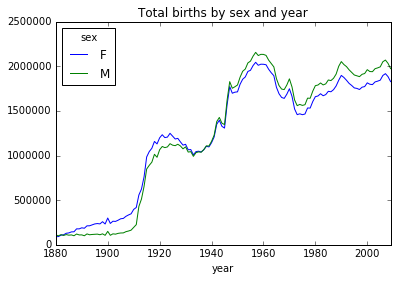

In [157]:
total_births.plot(title='Total births by sex and year')

In [165]:
# prop : the fraction of babies given each name relative to the total number of births.
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    return group

In [169]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [170]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [180]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)
#np.allclose(names.prop.sum(), 1) => False

True

In [183]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [184]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [185]:
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2009 M   1643437      Juelz   M     205  2009  0.000104
         1643440      Jamel   M     204  2009  0.000103
         1643441     Jaycob   M     204  2009  0.000103
         1643439   Geovanni   M     204  2009  0.000103
         1643438      Anton   M     204  2009  0.000103
         1643443   Jerimiah   M     203  2009  0.000103
         1643444      Kalel   M     203  2009  0.000103
         1643445       Mack   M     203  2009  0.000103
         1643446     Maddux   M     203  2009  0.000103
         1643442     Blaise   M     203  2009  0.000103
         1643447       Odin   M     202  2009  0.000102
         1643448     Stefan   M     202  2009  0.000102
         1643449     Deegan   M     201  2009  0.000102
         1643450    Eliezer   M     201  2009  0.000102
         1643451   Leonidas   M     201  2009  0.000102
         1643452       Cain   M     200  2009  0.000101
         1643453     Denzel   M     200  2009  0.000101
         1643456     Zavion   M     199  2009  0.000101
         1643454       Hugh   M     199  2009  0.000101
         1643455       Zaid   M     199  2009  0.000101
         1643457     Antony   M     198  2009  0.000100
         1643458       Chaz   M     197  2009  0.000100
         1643459   Fredrick   M     197  2009  0.000100
         1643460   Menachem   M     197  2009  0.000100
         1643461       Nick   M     197  2009  0.000100
         1643462      Stone   M     197  2009  0.000100
         1643463     Trevin   M     197  2009  0.000100
         1643464    Tyshawn   M     197  2009  0.000100
         1643468    Ronaldo   M     196  2009  0.000099
         1643467    Mustafa   M     196  2009  0.000099

[259877 rows x 5 columns]

# Analyzing Naming Trends

In [186]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [187]:
total_births = top1000.pivot_table('births', index=['year'], columns=['name'], aggfunc='sum')

In [188]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Ab,Abagail,Abb,Abbey,Abbie,Abbigail,...,Zita,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,71.0,NaN,...,NaN,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,81.0,NaN,...,NaN,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,80.0,NaN,...,6.0,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,79.0,NaN,...,NaN,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,98.0,NaN,...,11.0,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0
1885,NaN,NaN,NaN,88.0,6.0,NaN,NaN,NaN,88.0,NaN,...,NaN,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,84.0,NaN,...,NaN,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,104.0,NaN,...,11.0,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,137.0,NaN,...,NaN,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026C981D4F60>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000026C983120F0>], dtype=object)

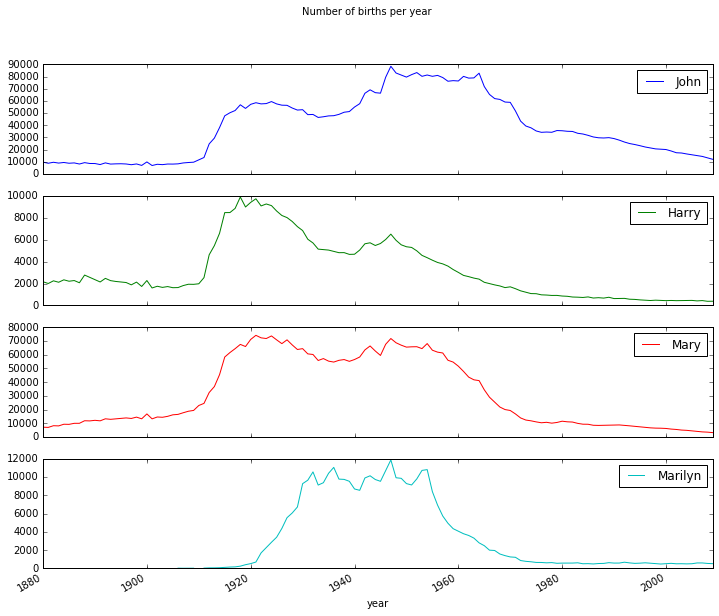

In [189]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

## Measuring the increase in naming diversity

In [190]:
table = top1000.pivot_table('prop', index=['year'], columns=['sex'], aggfunc='sum')

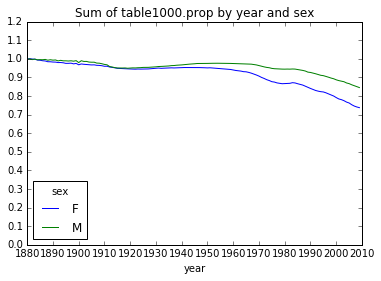

In [191]:
table.plot(title='Sum of table1000.prop by year and sex',
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [198]:
#boys
#df = boys[boys.year == 2019]
#df
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
top1000.tail()

name sex  births  year      prop
year sex                                             
2009 M   1643462    Stone   M     197  2009  0.000100
         1643463   Trevin   M     197  2009  0.000100
         1643464  Tyshawn   M     197  2009  0.000100
         1643468  Ronaldo   M     196  2009  0.000099
         1643467  Mustafa   M     196  2009  0.000099